In [ ]:
pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 124.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 178.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 170.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 270.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 267.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 314.0 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3


In [ ]:
import tensorflow as tf
import math
import pandas as pd
from pandas_datareader import data as pdr
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import yfinance as yfin
yfin.pdr_override()


In [ ]:
df = pdr.get_data_yahoo('TSLA', start='2020-04-03', end='2022-04-13')

[*********************100%***********************]  1 of 1 completed


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-04-03 00:00:00-04:00,33.966667,34.366001,31.226000,32.000668,32.000668,338431500
2020-04-06 00:00:00-04:00,34.080002,34.733334,33.197334,34.416000,34.416000,223527000
2020-04-07 00:00:00-04:00,36.333332,37.666668,35.489334,36.363335,36.363335,268797000
2020-04-08 00:00:00-04:00,36.946667,37.147331,35.555332,36.589333,36.589333,189840000
2020-04-09 00:00:00-04:00,37.472668,38.345333,37.140667,38.200001,38.200001,204750000


Text(0, 0.5, 'Close Price')

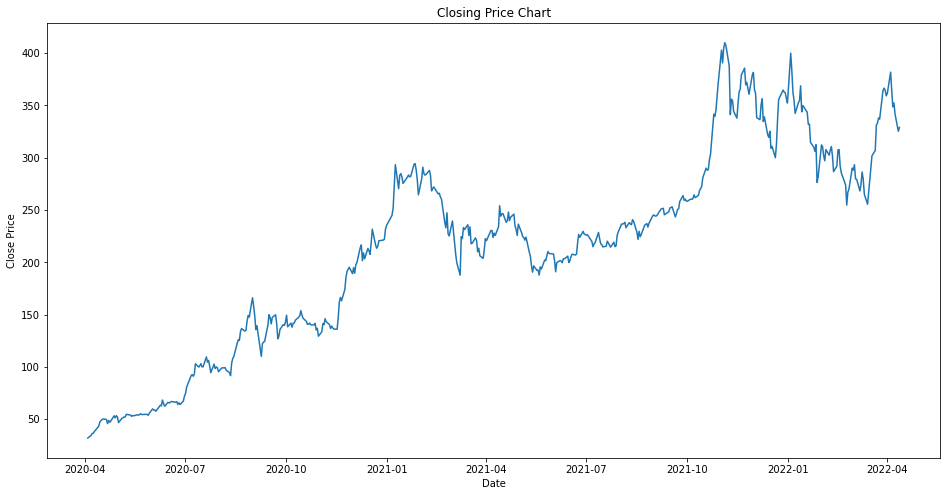

In [ ]:
#plot closing price
plt.figure(figsize=(16, 8))
plt.title('Closing Price Chart')
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')


In [ ]:
#taking date column and close column
close_price = df.filter(['Close'])
close_price.head()

,Close
Date,
2020-04-03 00:00:00-04:00,32.000668
2020-04-06 00:00:00-04:00,34.416000
2020-04-07 00:00:00-04:00,36.363335
2020-04-08 00:00:00-04:00,36.589333
2020-04-09 00:00:00-04:00,38.200001


In [ ]:
#convert df to numpy array
close_price_array = df["Close"].values.tolist()

close_price_array = np.array(close_price_array).reshape((511,1))

close_price_array.shape


(511, 1)

In [ ]:
#scaling data
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
normalize_data = scaler.fit_transform(close_price_array)

In [ ]:
normalize_data.shape

(511, 1)

In [ ]:
split = 408
train_data = normalize_data[:split]
val_data = normalize_data[split:]
print("Bentuk data latih: ", train_data.shape)
print("Bentuk data validasi: ", val_data.shape)

Bentuk data latih:  (408, 1)
Bentuk data validasi:  (103, 1)


In [ ]:
#create training data and validation data using tensor spec
def window_dataset(series, window_size, shuffle_buffer):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    ds = ds.shuffle(buffer_size=shuffle_buffer)
    return ds.batch(1).prefetch(1)

# windowed dataset without shuffle
def window_dataset2(series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    return ds.batch(1).prefetch(1)

In [ ]:
windowed_train = window_dataset(train_data, 7, 400)
windowed_val = window_dataset2(val_data, 7)
windowed_train

<PrefetchDataset element_spec=(TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None, None, 1), dtype=tf.float64, name=None))>

In [ ]:
for x, y in windowed_train:
  print("x = ", x.numpy().shape)
  print("y = ", y.numpy().shape)
  print()

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1, 7, 1)
y =  (1, 1, 1)

x =  (1,

In [ ]:
def stock_prediction_model():
  model = tf.keras.models.Sequential([
          tf.keras.layers.LSTM(128, return_sequences=True, input_shape=[7, 1]),
          tf.keras.layers.LSTM(128),
          tf.keras.layers.Dense(1),
  ])

  model.compile(optimizer="sgd", loss=tf.keras.losses.Huber(), metrics=['MAPE'])

  return model

In [ ]:
model = stock_prediction_model()
history = model.fit(windowed_train, epochs=15)

Epoch 1/15
401/401 [==============================] - 10s 6ms/step - loss: 0.0194 - MAPE: 91.3995
Epoch 2/15
401/401 [==============================] - 4s 9ms/step - loss: 0.0119 - MAPE: 80.1848
Epoch 3/15
401/401 [==============================] - 4s 9ms/step - loss: 0.0082 - MAPE: 66.2286
Epoch 4/15
401/401 [==============================] - 4s 9ms/step - loss: 0.0052 - MAPE: 51.3220
Epoch 5/15
401/401 [==============================] - 4s 9ms/step - loss: 0.0031 - MAPE: 37.9608
Epoch 6/15
401/401 [==============================] - 3s 7ms/step - loss: 0.0018 - MAPE: 26.6434
Epoch 7/15
401/401 [==============================] - 2s 5ms/step - loss: 0.0012 - MAPE: 17.9811
Epoch 8/15
401/401 [==============================] - 2s 5ms/step - loss: 8.8000e-04 - MAPE: 13.5661
Epoch 9/15
401/401 [==============================] - 2s 5ms/step - loss: 7.8295e-04 - MAPE: 10.4559
Epoch 10/15
401/401 [==============================] - 2s 5ms/step - loss: 7.3733e-04 - MAPE: 8.9217
Epoch 11/15
401/4

dict_keys(['loss', 'MAPE'])


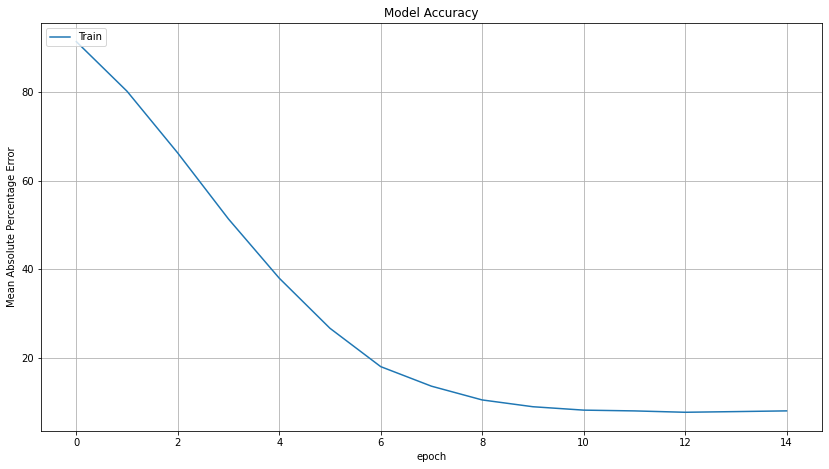

In [ ]:
print(history.history.keys())

plt.figure(figsize=(14, 7.5))
plt.plot(history.history['MAPE'], label="Train")
plt.title('Model Accuracy')
plt.ylabel('Mean Absolute Percentage Error')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

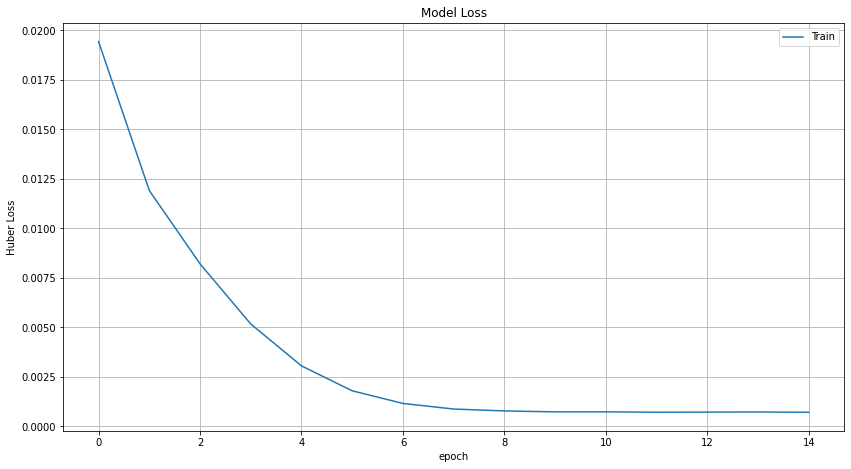

In [ ]:
plt.figure(figsize=(14, 7.5))
plt.plot(history.history['loss'], label="Train")
plt.title('Model Loss')
plt.ylabel('Huber Loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
prediction = model.predict(windowed_val)
prediction = scaler.inverse_transform(prediction)

97/97 [==============================] - 1s 3ms/step


Mean Absolute Percentage Error: 4.6499602002116385


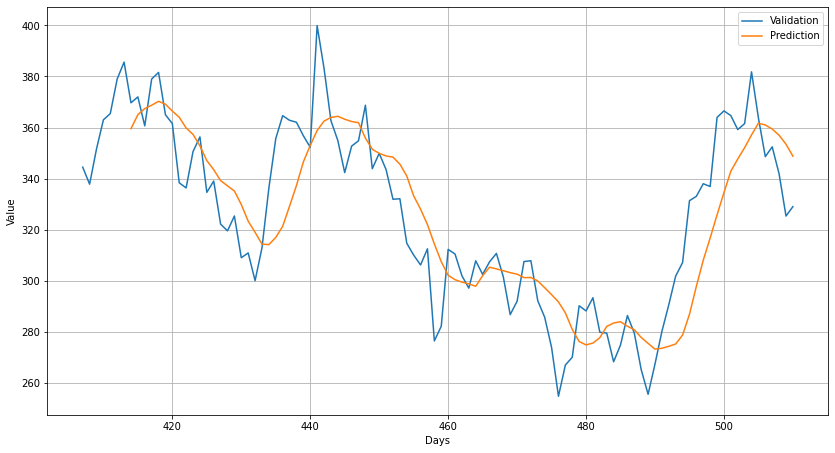

In [ ]:

time = []

for i in range(len(normalize_data)):
  time.append(i)
plt.figure(figsize=(14, 7.5))
#plt.plot(time[:split], close_price_array[:split], label="Train")
plt.plot(time[split-1:], close_price_array[split-1:], label="Validation")
plt.plot(time[414:], prediction, label="Prediction")
plt.xlabel("Days")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
mape = np.mean(np.abs((close_price_array[split+6:] - prediction)/close_price_array[split+6:]))*100
print("Mean Absolute Percentage Error:", mape)

In [ ]:
li = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in li[6:]:
  print(i)

(97, 1)